# Explorando Datasets con *pandas* and Matplotlib<a id="0"></a>

Herramientas: El curso depende fuertemente de [**pandas**](http://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) y [**Numpy**](http://www.numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) para el manejo de información, análisis, y visualización. La principal librería que usaremos para gráficar en este curso es [Matplotlib](http://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01).

Dataset: Inmigración a Canada desde 1980 a 2013 - [Flujo de migración internacional desde y hacia los países seleccionados - revisión del 2015](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) de la pagina web de las Naciones Unidas .

el dataset contiene información del flujo de migración internacional registrado por los países de destino. la información presenta ambos flujos entrada y salida de acuerdo al lugar de nacimiento, ciudadanía o lugar previo / siguiente residencia para ambos extranjeros y nacionales. Para esta lección, nos concentraremos en la migración de Canda.

# Descargando y preparando la información <a id="2"></a>


Importamos los módulos primarios. la primera cosa que haremos es importar los dos módulos importantes para el análisis de datos: pandas y numpy.

In [2]:
import numpy as np
import pandas as pd

Descargamos el dataset de la inmigración Canadiense y lo leemos desde un dataframe de pandas.

In [3]:
import io
import urllib.request

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx'
resp = urllib.request.urlopen(URL)


if resp.getcode()==200:
    content = resp.read()
    df_can = pd.read_excel(io.BytesIO(content),
        sheet_name='Canada by Citizenship',
        skiprows=range(20),
        skipfooter=2)
    print('Data downloaded and read into a dataframe!')
else:
    print("Error al descargar el archivo")

Data downloaded and read into a dataframe!


Demos le una mirada a los primeros cinco items en nuestro dataset.

In [4]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


Veamos cuantas entradas tiene nuestro dataset

In [5]:
print(df_can.shape)

(195, 43)


Limpiaremos los datos. Haremos algunas modificaciones al conjunto de datos original para que sea más fácil crear nuestras visualizaciones. Consulta el laboratorio `Introducción a Matplotlib y los gráficos de líneas` para obtener una descripción detallada y justificada de los cambios.

#### 1. Limpiando el dataset para remover las columnas que no son informativas para nosotros para la visualización(ej. Type, AREA, REG).


In [6]:
df_can.drop(["AREA", "REG","DEV","Type","Coverage"],axis=1, inplace=True)

#Veamos los primeros cinco elementos y veamos como ha cambiado el dataframe
df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


Nota como las columnas Type, Coverage, AREA, REG, and DEV fueron removidas del dataframe

#### 2. Renombraremos algunas columnas para que asi tengan sentido.

In [7]:
df_can.rename(columns={"OdName":"Country", "AreaName":"Continent","RegName":"Region"}, inplace=True)

#Veamos los primeros cinco elementos del dataframe para ver como ha cambiado.
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


Notas como los nombres de las columnas ahora tienen mas sentido incluso para alguien que es de afuera.

#### 3. Para una mayor consistencia, asegúrate de que todas los rótulos de las columnas sean de tipo string.


In [8]:
# Vamos a examinar el tipo de los rótulos de las columnas
all(isinstance(column,str)for column in df_can.columns)

False

Nota como la linea de código de arriba retorna *False* cuando testeamos si los rótulos de las columnas son de tipo **string**. Así que vamos a cambiar las todas al tipo **string**.

In [9]:
df_can.columns = list(map(str,df_can.columns))

# Vamos a revisar el tipo de los rótulos de las columnas.
all(isinstance(column,str) for column in df_can.columns)

True

#### 4. Usaremos el nombre del país como index - util para una revision rápida buscando por el nombre con el método .loc.


In [10]:
df_can.set_index("Country", inplace=True)

#Veamos los primeros cinco elementos y veamos como el ha cambiado el dataframe.

df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


Nota como el nombre de los países ahora sirve como indices de búsqueda.

#### 5. Agrega la columna total.

In [11]:
df_can["Total"] = df_can.iloc[:,4:].sum(axis=1)

# Vamos a revisar los primeros cinco elementos del dataframe para ver como quedo
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58623
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15698
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69359
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


Ahora el dataframe tiene una columna extra que presenta el numero total de inmigrantes de cada país desde 1980 - 2013. asi que si imprimimos la dimensión de la información, obtenemos:

In [12]:
print("Dimension de la información: ", df_can.shape)

Dimension de la información:  (195, 38)


Así que ahora nuestro dataframe tiene 38 columnas en vez de 37 como teníamos anteriormente.

In [13]:
# Finalmente crearemos una lista de los años, desde 1980-2013.
# Esto sera de utilidad cuando comencemos a gráficar la información.

years = list(map(str, range(1980,2014)))

years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

# Visualización de la información usando Matplotlib<a id="4"></a>

Importaremos la librería `matplotlib`.

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use("ggplot") #opcional para los que les gusta el estilo ggplot

# revisamos si estamos usando la ultima version de matplotlib.
print("Version de Matplotlib :", mpl.__version__)

Version de Matplotlib : 3.7.2


# Gráficos de Area<a id="6"></a>

En este ultimo módulo, creamos un gráfico de linea que visualiza el top 5 de los países que contribuyeron con más inmigrantes a Canada desde 1980 a 2013. con pequeñas modificaciones al código, podemos visualizar este gráfico como un cumulative plot, también conocido como **Stacked Line Plot** o **Area plot**.


In [15]:
df_can.sort_values(["Total"], ascending=False, axis=0,inplace=True)

# Obtenemos el top 5 de entradas.
df_top5 = df_can.head()

# Transponemos al dataframe.
df_top5 = df_top5[years].transpose()

df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


Los gráficos de área están apilados por defecto. Y para producir un gráfico de área apilada, cada columna debe ser de valores positivos o negativos (cualquier valor `NaN`, es decir, no es un número, se convertirá por defecto a 0). Para producir un gráfico sin apilar, establece el parámetro `stacked` al valor `False`.

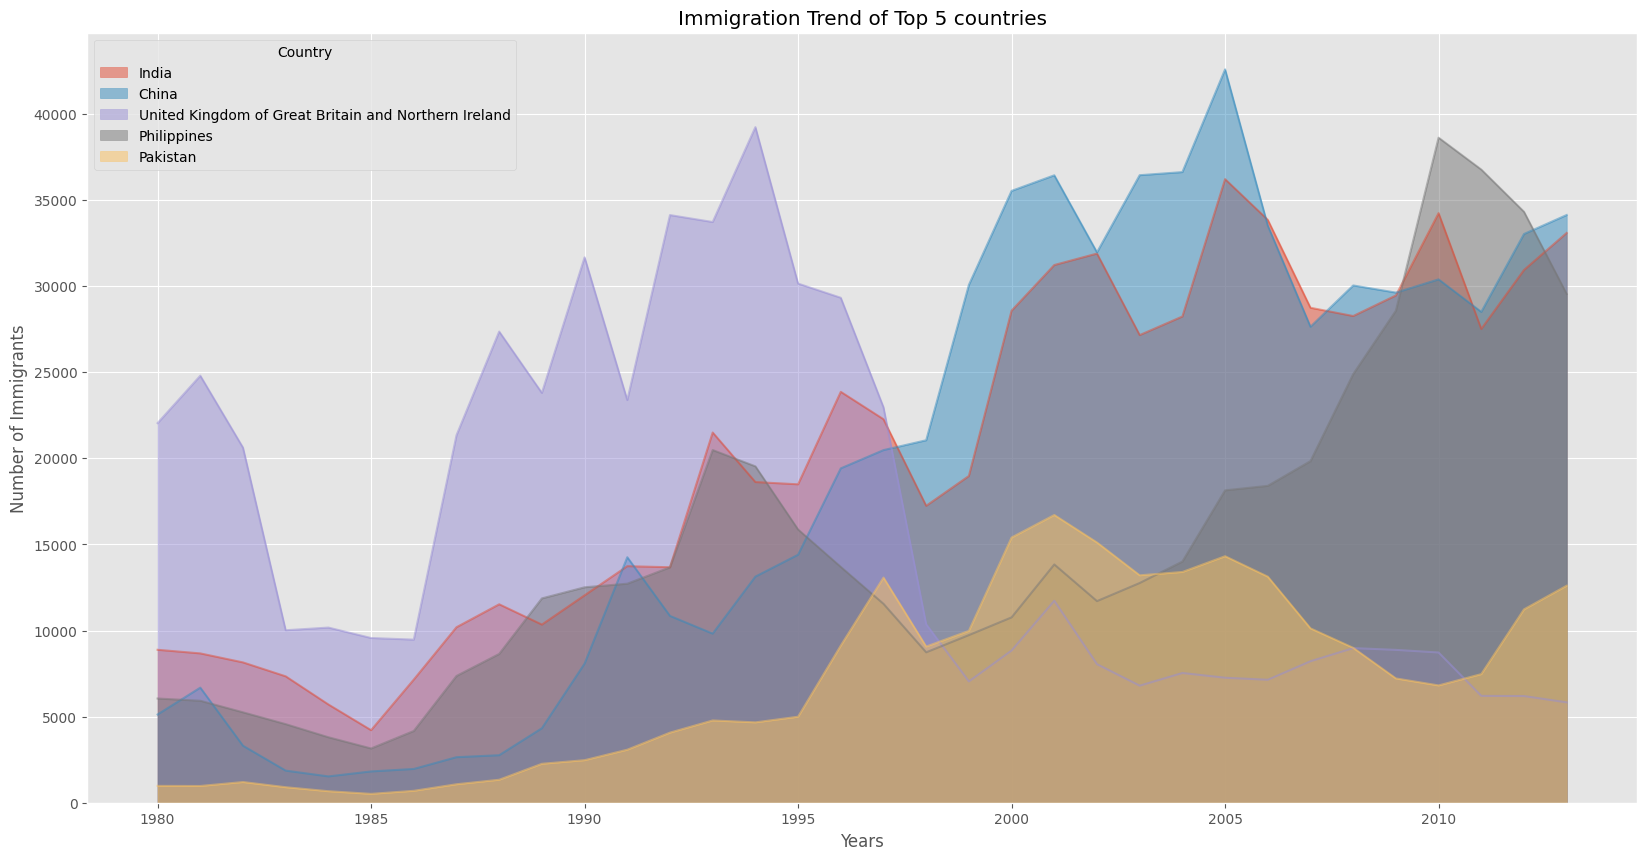

In [16]:
# Vamos a cambiar el valor del index del dataframe df_top5 a tipo integer para gráficar.
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind="area",
             stacked=False,
             figsize=(20,10)) # pasamos una tupla de tamaño (x,y).

plt.title("Immigration Trend of Top 5 countries")
plt.ylabel("Number of Immigrants")
plt.xlabel("Years")

plt.show()

El gráfico sin apilar tiene una transparencia predeterminada (valor alfa) de 0,5. Podemos modificar este valor pasando el parámetro `alpha`.

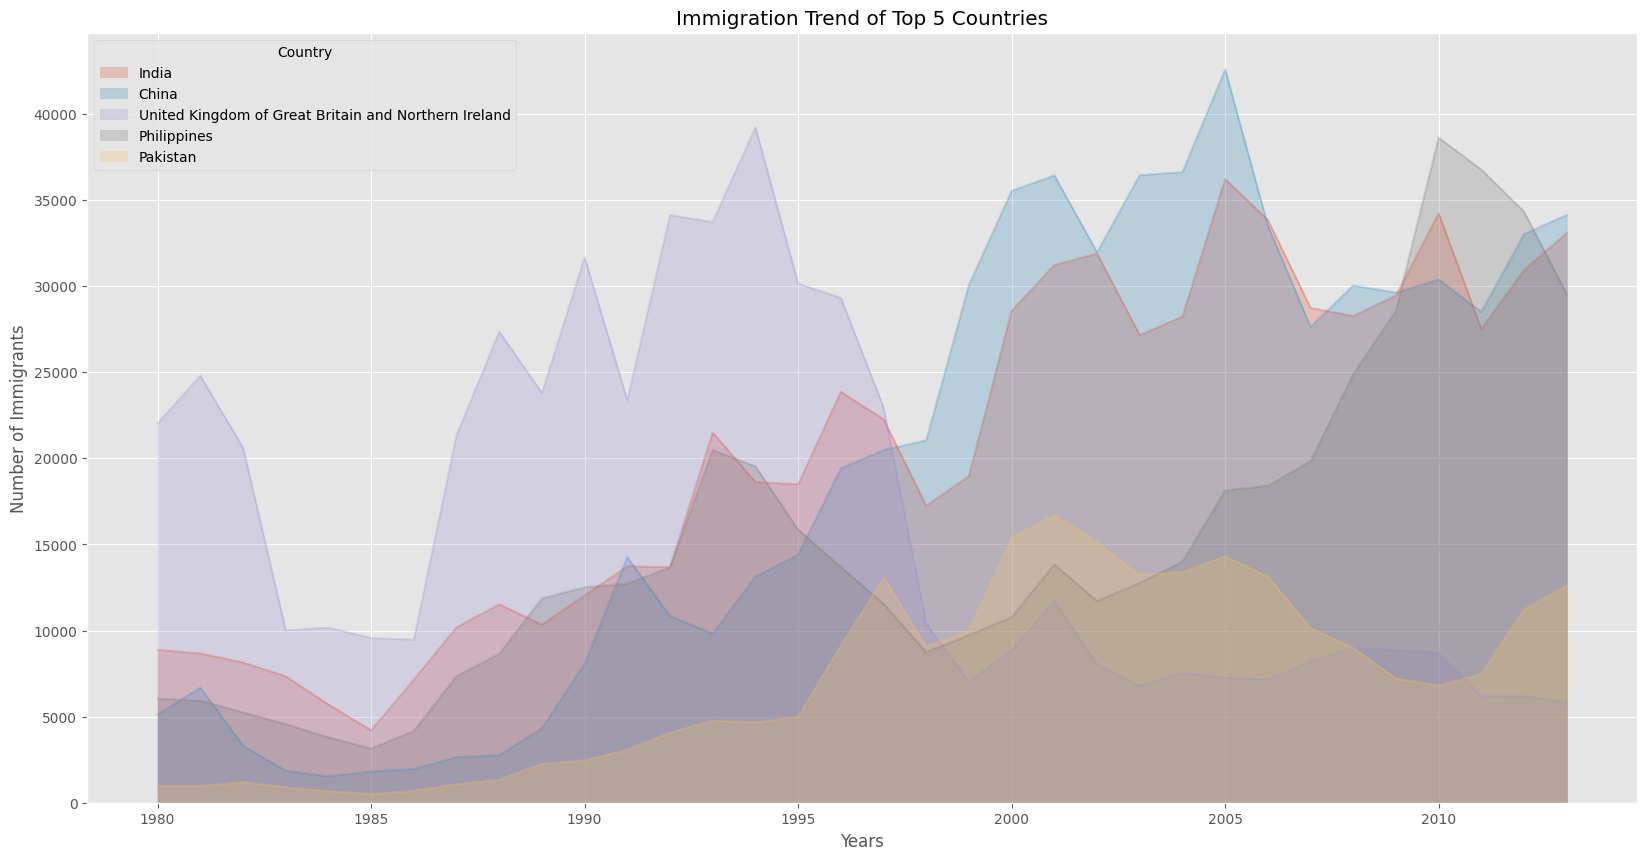

In [17]:
df_top5.plot(kind="area",
             alpha= 0.25,
             stacked=False,
             figsize=(20,10))

plt.title("Immigration Trend of Top 5 Countries")
plt.ylabel("Number of Immigrants")
plt.xlabel("Years")

plt.show()

### Dos Tipos de Gráficos

Como lo discutimos en el video, hay dos estilos/opciones con `matplotlib`，gráficar usando la capa Artisitica o gráficar usando la capa del Script.

\*\*Opción 1: Capa Scripting (procedural method) - usando matplotlib.pyplot as 'plt' \*\*

Puedes usar `plt` o `matplotlib.pyplot` y agregar más elementos llamando diferentes métodos de manera procedural; por ejemplo, `plt.title(...)` para agregar un titulo o `plt.xlabel(...)` par agregar el rotulo al eje-x.

```python
    # Option 1: This is what we have been using so far
    df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10)) 
    plt.title('Immigration trend of top 5 countries')
    plt.ylabel('Number of immigrants')
    plt.xlabel('Years')
```

\*\*Opción 2: Capa Artística (Object oriented method) - utilizando una instancia de Axes de Matplotlib (preferida) \*\*

Puedes utilizar una instancia de `Axes` de tu actual gráfico y guardarla en una variable (ej. `ax`). Puedes agregar mas elementos al hacer pequeños cambios en la sintaxis para llamar métodos (agregando "`set_`" al método previo). Por ejemplo, usa `ax.set_title()` en vez de `plt.title()` para agregar un titulo,  o `ax.set_xlabel()` en vez de `plt.xlabel()` para agregar un rotulo al eje-xs.

Esta opción a veces es mas transparente y flexible para usar en gráficos mas avanzados (en particular cuando tienes varios gráficos, como veras más adelante).

En este curso, nos apegaremos al **scripting layer**, excepto por algunas visualizaciones avanzadas donde necesitaremos la **artist layer** para manipular aspectos de los gráficos.

Text(0.5, 0, 'Years')

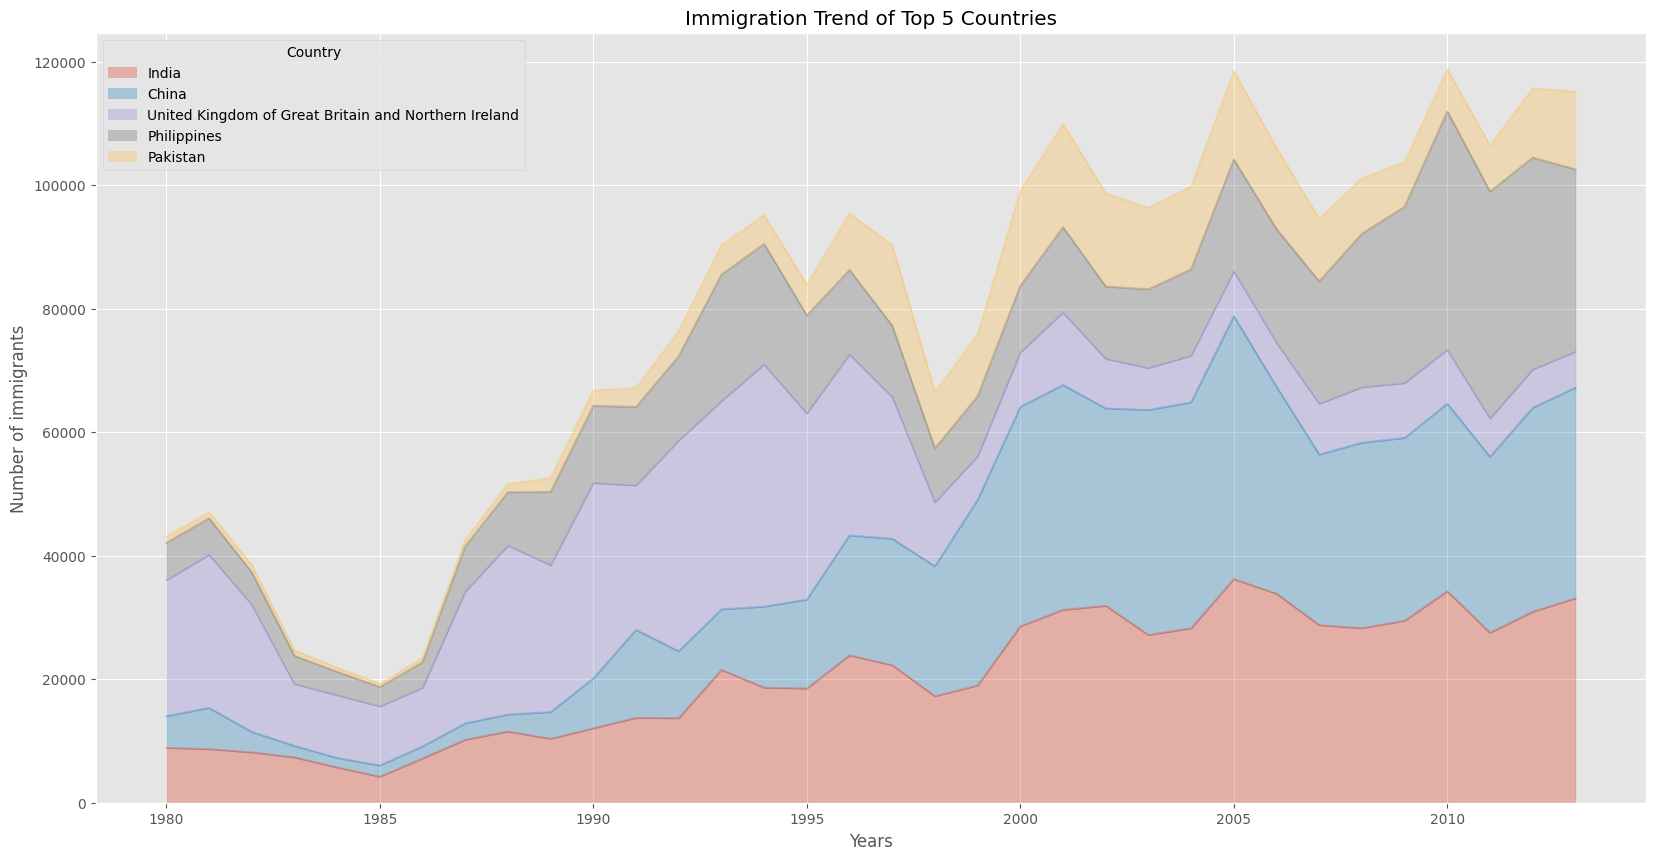

In [18]:
#Opción 2: opción preferida y con mayor flexibilidad.
ax=df_top5.plot(kind="area", alpha=0.35, figsize=(20,10))

ax.set_title("Immigration Trend of Top 5 Countries")
ax.set_ylabel("Number of immigrants")
ax.set_xlabel("Years")

**Pregunta**: Usa la capa artística (artist layer) para crear un gráfico de area desagrupado del top 5 de los países que contribuyen con la menor inmigración a Canada **desde** 1980 to 2013. Usa un valor de transparencia de 0.55.

Text(0.5, 0, 'Years')

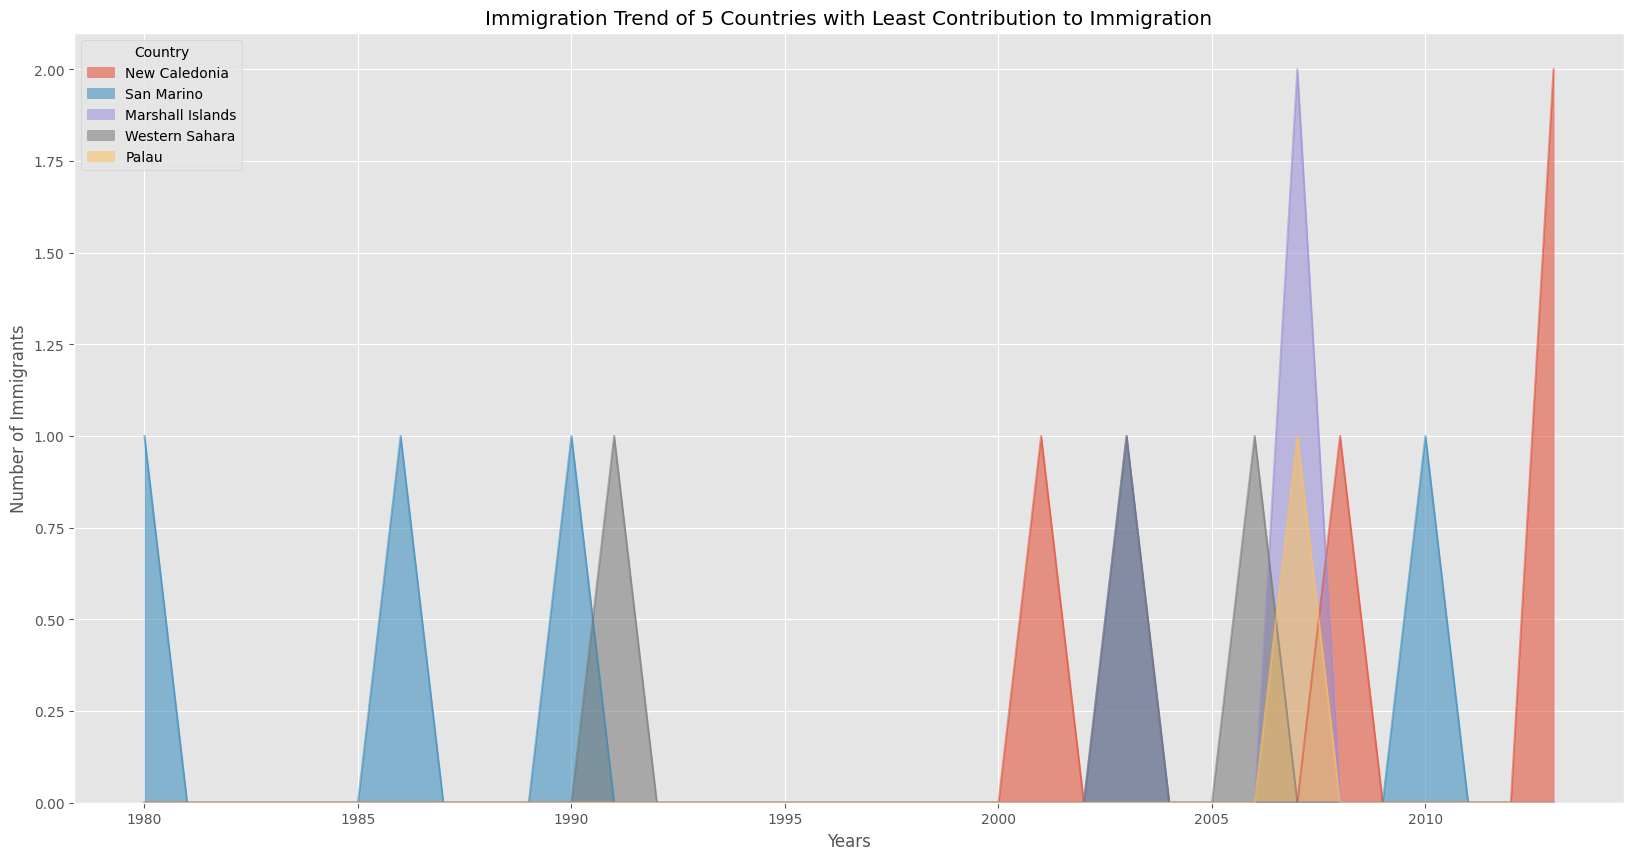

In [25]:
df_least5 = df_can.tail(5)
df_least5 = df_least5[years].transpose()
df_least5.head()

df_least5.index =df_least5.index.map(int) # vamos a cambiar el valor del indice de df_least5 a tipo integer para poder gráficar
ax= df_least5.plot(kind="area",
                   alpha=0.55,
                   stacked=False,
                   figsize=(20,10))

ax.set_title("Immigration Trend of 5 Countries with Least Contribution to Immigration")
ax.set_ylabel("Number of Immigrants")
ax.set_xlabel("Years")